In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 

In [2]:
file_path = "/Users/atenafazeli/Desktop/ML/Classisfication /Decision Tree/drug200.csv"

df = pd.read_csv(file_path)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.shape

(200, 6)

# Preprocessing

In [4]:
x = df [['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [5]:
y = df [['Drug']].values
y[0:5]

array([['drugY'],
       ['drugC'],
       ['drugC'],
       ['drugX'],
       ['drugY']], dtype=object)

#### Fit & Transform

In [6]:
from sklearn import preprocessing 

le_sex = preprocessing.LabelEncoder()
le_BP = preprocessing.LabelEncoder()
le_Chol = preprocessing.LabelEncoder()

x[:, 1] = le_sex.fit_transform(x[:, 1]) 
x[:, 2] = le_BP.fit_transform(x[:, 2])   
x[:, 3] = le_Chol.fit_transform(x[:, 3])  

print(x[0:5])


[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.114]
 [28 0 2 0 7.798]
 [61 0 1 0 18.043]]


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_trainset, x_testset, y_trainset, y_testset = train_test_split (x, y, test_size = 0.3, random_state = 3)

In [9]:
drugTree = DecisionTreeClassifier (criterion = 'entropy', max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
drugTree.fit (x_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Prediction

In [11]:
predTree = drugTree.predict (x_testset)

In [12]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
[['drugY']
 ['drugX']
 ['drugX']
 ['drugX']
 ['drugX']]


In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
print('DecisionTrees Accuracy: ', metrics.accuracy_score(y_testset, predTree) )

DecisionTrees Accuracy:  0.9833333333333333


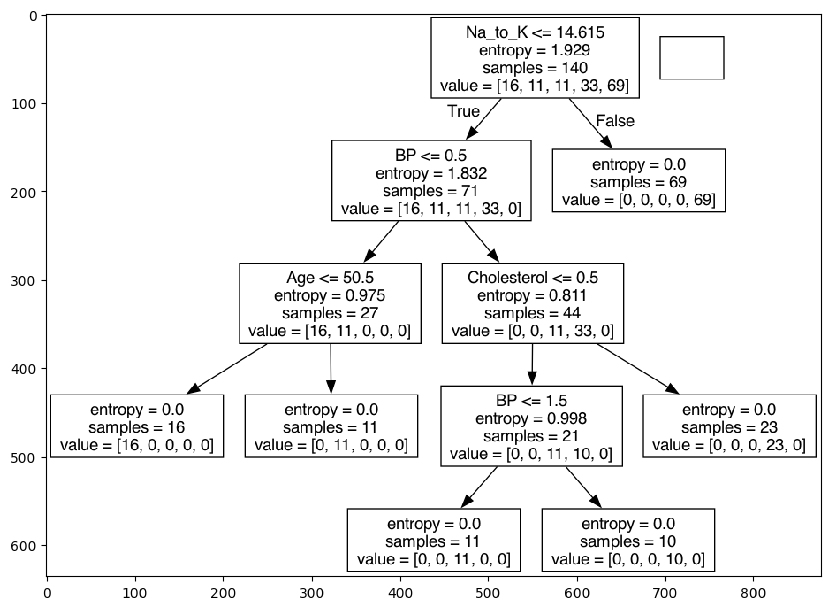

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.image as mpimg
import os

# Create DOT data
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]

# Export the decision tree to DOT format
export_graphviz(drugTree, feature_names=featureNames, out_file=dot_data, class_names=None)

# Create the graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Specify the path to the GraphViz executable
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin'

# Write the decision tree to a PNG file
graph.write_png(filename)

# Display the decision tree image
img = mpimg.imread(filename)
plt.figure(figsize=(10, 20))
plt.imshow(img, interpolation='nearest')
plt.show()
